In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Discovery

In [69]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [70]:
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
data_by_gender = df['sex'].value_counts()

<Axes: ylabel='sex'>

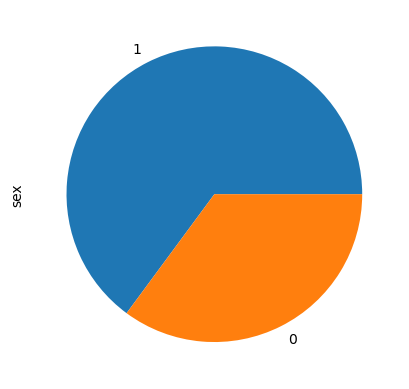

In [21]:
# visualize the results
data_by_gender.plot(kind='pie')

# Data preprocessing

In [71]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04,
        -8.47579380e-01, -1.53055953e+00,  1.35927151e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00,
        -8.47579380e-01, -7.07675018e-03, -7.35688190e-01,
         7.53566018e-09, -2.84552352e-01, -1.41976151e-01,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01,
        -8.47579380e-01, -1.53055953e+00, -7.35688190e-01,
        -1.03807313e+00, -9.09000174e-02, -1.73104612e+00,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       [-9.12335403e-01,  1.14796753e+00, -4.86071002e-01,
        -8.47579380e-01, -1.53055953e+00, -7.35688190e-01,
        -5.46474088e-01,  4.90056987e-01,  8.50338444e-02,
         7.35688190e-01, -6.87681906e-01, -1.59078490e+00],
       [ 3.50832977e-01,  1.14796753e+00, -4.3548586

# Filter Feature Selection

Removing Constant Features using Variance Threshold

In [72]:
constant_filter = VarianceThreshold(threshold=0)

In [73]:
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [74]:
len(X_train.columns[constant_filter.get_support()])

12

That's mean out of 12 features in the training set 12 features are not constant.

This code is to find number of constant featurse (in our case it's 0)

In [75]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [76]:
for column in constant_columns:
    print(column)

# KNN Classifier

# Don't distrubte Machine is learning!🤖

In [84]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

## Let 's Test the Machine 

In [88]:
yhat = neigh.predict(X_test)
yhat == y_test

206    False
188     True
12     False
219     True
237     True
       ...  
156     True
226     True
272     True
27     False
144    False
Name: DEATH_EVENT, Length: 75, dtype: bool

In [87]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7723214285714286
Test set Accuracy:  0.6


Here we want to find out the best value for K, so this code try from 1 to 10 

In [32]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.53333333, 0.57333333, 0.50666667, 0.6       , 0.56      ,
       0.58666667, 0.6       , 0.66666667, 0.61333333])

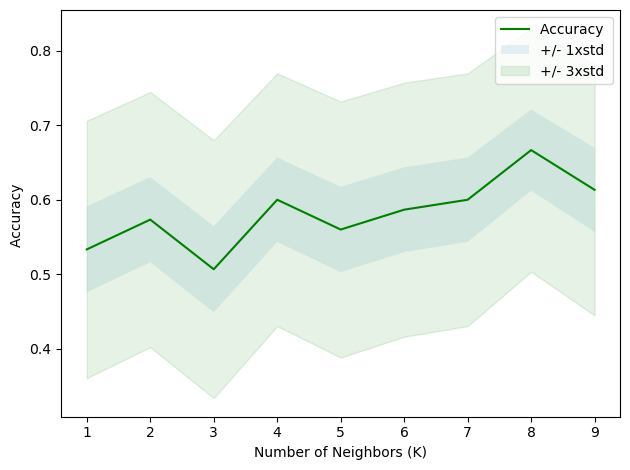

In [35]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [36]:
print( "Best accuracy for our module is: ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Best accuracy for our module is:  0.6666666666666666 with k= 8


# Decision Tree

# Don't distrubte Machine is learning!🤖

In [57]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 100, 
                                      max_depth=5, min_samples_leaf=10)
clf = clf.fit(X_train, y_train)

[Text(0.359375, 0.9166666666666666, 'x[11] <= 73.5\nentropy = 0.891\nsamples = 224\nvalue = [155, 69]'),
 Text(0.125, 0.75, 'x[4] <= 27.5\nentropy = 0.677\nsamples = 56\nvalue = [10, 46]'),
 Text(0.0625, 0.5833333333333334, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.1875, 0.5833333333333334, 'x[0] <= 73.5\nentropy = 0.842\nsamples = 37\nvalue = [10, 27]'),
 Text(0.125, 0.4166666666666667, 'x[8] <= 136.5\nentropy = 0.961\nsamples = 26\nvalue = [10, 16]'),
 Text(0.0625, 0.25, 'entropy = 0.65\nsamples = 12\nvalue = [2, 10]'),
 Text(0.1875, 0.25, 'entropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(0.25, 0.4166666666666667, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.59375, 0.75, 'x[7] <= 1.25\nentropy = 0.576\nsamples = 168\nvalue = [145, 23]'),
 Text(0.4375, 0.5833333333333334, 'x[11] <= 173.0\nentropy = 0.325\nsamples = 118\nvalue = [111, 7]'),
 Text(0.375, 0.4166666666666667, 'x[2] <= 125.5\nentropy = 0.52\nsamples = 60\nvalue = [53, 7]'),
 Text(0.3125, 0.

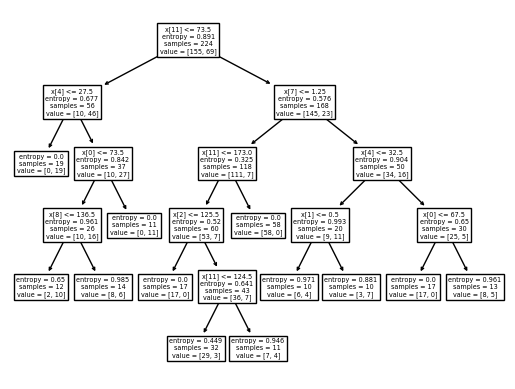

In [58]:
tree.plot_tree(clf)

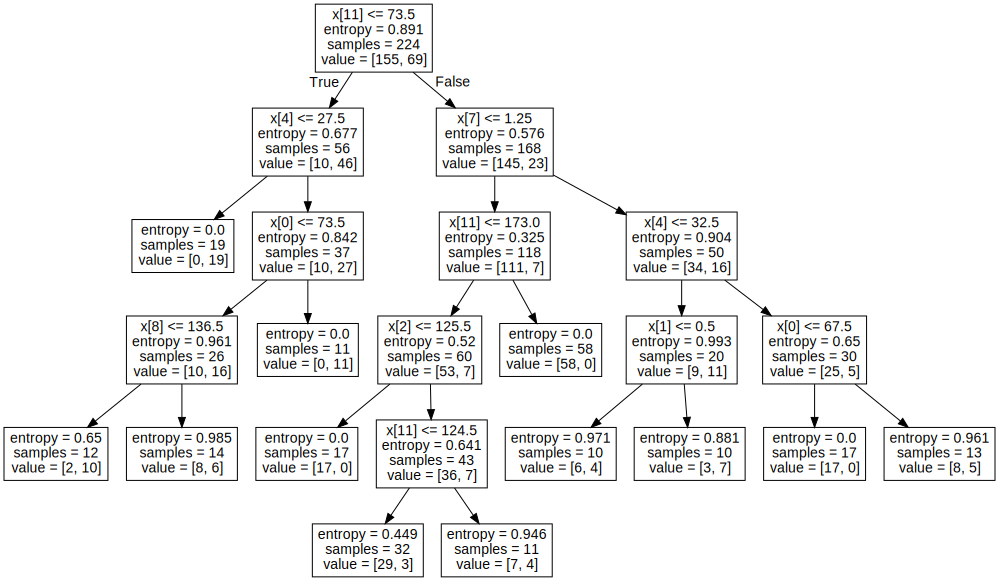

In [59]:
# GraphViz gives a better and clearer Graph.
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

# Let 's Test the Machine 

In [60]:
X_pred = clf.predict(X_test)

In [61]:
# verifying if the model has predicted it all right.
X_pred == y_test

206     True
188     True
12     False
219     True
237     True
       ...  
156     True
226    False
272     True
27      True
144     True
Name: DEATH_EVENT, Length: 75, dtype: bool

In [62]:
accuracy_NB = accuracy_score(y_test, X_pred)
accuracy_NB

0.7733333333333333